In [ ]:
!pip install stable_baselines3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.7/181.7 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 20.7 MB/s eta 0:00:00


In [ ]:
#########################################################################
## MONTAR DRIVE
#########################################################################
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import csv
from stable_baselines3 import PPO
import gymnasium as gym
import numpy as np

2024-06-04 16:43:11.588871: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-04 16:43:11.614269: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-04 16:43:12.050164: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [9]:
TOTAL_TIMESTEP_cartpole=250000
TOTAL_TIMESTEP_acrobot=250000  # Reducimos para que tenga un número de step igual a CartPole, aprox 5000
TOTAL_TIMESTEP_lunarlander=200000

EPISODES=10

# CartPole

In [ ]:
expert_observations=[]
expert_actions=[]
expert_next_observations=[]
expert_rewards=[]
expert_n_trayectoria=[]

env = gym.make('CartPole-v1')

# Definimos el modelo experto
ppo=PPO(policy="MlpPolicy", env=env, verbose=0)
ppo.learn(total_timesteps=TOTAL_TIMESTEP_cartpole)

expert_observations = '/content/drive/MyDrive/Extended_GAIL/observations_CartPole_.csv'
expert_actions = '/content/drive/MyDrive/Extended_GAIL/actions_CartPole_.csv'
expert_next_observations='/content/drive/MyDrive/Extended_GAIL/next_observations_CartPole_.csv'
expert_rewards='/content/drive/MyDrive/Extended_GAIL/rewards_CartPole_.csv'
expert_n_trayectoria='/content/drive/MyDrive/Extended_GAIL/n_trayectoria_CartPole_.csv'

with open(expert_observations, 'w', newline='') as expert_observations_csv:
    # Crear el escritor CSV
    escritor_csv_obs=csv.writer(expert_observations_csv)
    with open(expert_actions, 'w', newline='') as expert_actions_csv:
        escritor_csv_act=csv.writer(expert_actions_csv)
        with open(expert_next_observations, 'w', newline='') as expert_next_observations_csv:
            escritor_csv_next_obs=csv.writer(expert_next_observations_csv)
            with open(expert_rewards, 'w', newline='') as expert_rewards_csv:
                escritor_csv_reward=csv.writer(expert_rewards_csv)
                with open(expert_n_trayectoria, 'w', newline='') as expert_n_trayectoria_csv:
                  escritor_csv_n_tray=csv.writer(expert_n_trayectoria_csv)

                  for i in range(EPISODES):
                      obs, info = env.reset()
                      terminated = False
                      truncated=False

                      while not terminated and not truncated:
                          a, _ = ppo.predict(obs)
                          obs2, reward, terminated, truncated, info = env.step(a)

                          escritor_csv_obs.writerow(obs)

                          escritor_csv_act.writerow([a])
                          escritor_csv_next_obs.writerow(obs2)
                          escritor_csv_reward.writerow([reward])
                          escritor_csv_n_tray.writerow([i])
                          obs=obs2
                    

                    

env.close()

   1.0
0  1.0
1  1.0
2  1.0
3  1.0
4  1.0


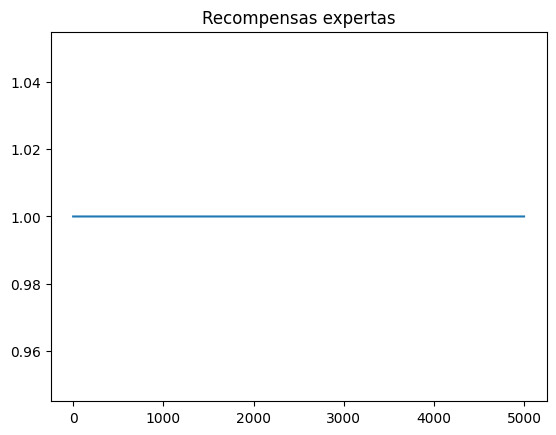

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Lee el archivo CSV
df = pd.read_csv('/home/usuario/Escritorio/Universidad/Master/IA4TES/Mayo/CarPole/rewards_CartPole_.csv')


print(df.head())

plt.plot(df)
plt.title('Recompensas expertas')
plt.show()

In [4]:
print(df.shape[0])

4999


In [5]:
expert_num_tray=np.genfromtxt('/home/usuario/Escritorio/Universidad/Master/IA4TES/Mayo/CarPole/n_trayectoria_CartPole_.csv', dtype=np.int32)

In [6]:
print(expert_num_tray)

[0 0 0 ... 9 9 9]


In [7]:
import numpy as np

longitud_trayectoria_0 = np.count_nonzero(expert_num_tray == 0)
longitud_trayectoria_1 = np.count_nonzero(expert_num_tray == 1)
longitud_trayectoria_2 = np.count_nonzero(expert_num_tray == 2)
longitud_trayectoria_3 = np.count_nonzero(expert_num_tray == 3)
longitud_trayectoria_4 = np.count_nonzero(expert_num_tray == 4)
longitud_trayectoria_5 = np.count_nonzero(expert_num_tray == 5)
longitud_trayectoria_6 = np.count_nonzero(expert_num_tray== 6)
longitud_trayectoria_7 = np.count_nonzero(expert_num_tray == 7)
longitud_trayectoria_8 = np.count_nonzero(expert_num_tray== 8)
longitud_trayectoria_9 = np.count_nonzero(expert_num_tray== 9)


print(longitud_trayectoria_0 )
print(longitud_trayectoria_1 )
print(longitud_trayectoria_2 )
print(longitud_trayectoria_3 )
print(longitud_trayectoria_4 )
print(longitud_trayectoria_5 )
print(longitud_trayectoria_6 )
print(longitud_trayectoria_7 )
print(longitud_trayectoria_8 )
print(longitud_trayectoria_9 )


500
500
500
500
500
500
500
500
500
500


In [8]:
expert_rewards=np.genfromtxt('/home/usuario/Escritorio/Universidad/Master/IA4TES/Mayo/CarPole/rewards_CartPole_.csv', dtype=np.int32)

print(np.sum(expert_rewards[0:500]))
print(np.sum(expert_rewards[500:1000]))
print(np.sum(expert_rewards[1000:1500]))
print(np.sum(expert_rewards[1500:2000]))
print(np.sum(expert_rewards[2000:2500]))
print(np.sum(expert_rewards[2500:3000]))
print(np.sum(expert_rewards[3000: 3500 ]))
print(np.sum(expert_rewards[3500: 4000]))
print(np.sum(expert_rewards[4000: 4500]))
print(np.sum(expert_rewards[4500 : 5000]))

500
500
500
500
500
500
500
500
500
500


# ACROBOT

In [11]:
expert_observations=[]
expert_actions=[]
expert_next_observations=[]
expert_rewards=[]
expert_n_trayectoria=[]

env = gym.make('Acrobot-v1')

# Definimos el modelo experto
ppo=PPO(policy="MlpPolicy", env=env, verbose=0)
ppo.learn(total_timesteps=TOTAL_TIMESTEP_acrobot)

expert_observations = '/home/usuario/Escritorio/Universidad/Master/IA4TES/Mayo/Acrobot/observations_Acrobot__.csv'
expert_actions = '/home/usuario/Escritorio/Universidad/Master/IA4TES/Mayo/Acrobot/actions_Acrobot__.csv'
expert_next_observations='/home/usuario/Escritorio/Universidad/Master/IA4TES/Mayo/Acrobot/next_observations_Acrobot__.csv'
expert_rewards='/home/usuario/Escritorio/Universidad/Master/IA4TES/Mayo/Acrobot/rewards_Acrobot__.csv'
expert_n_trayectoria='/home/usuario/Escritorio/Universidad/Master/IA4TES/Mayo/Acrobot/n_trayectoria_Acrobot__.csv'

In [12]:
with open(expert_observations, 'w', newline='') as expert_observations_csv:
    # Crear el escritor CSV
    escritor_csv_obs=csv.writer(expert_observations_csv)
    with open(expert_actions, 'w', newline='') as expert_actions_csv:
        escritor_csv_act=csv.writer(expert_actions_csv)
        with open(expert_next_observations, 'w', newline='') as expert_next_observations_csv:
            escritor_csv_next_obs=csv.writer(expert_next_observations_csv)
            with open(expert_rewards, 'w', newline='') as expert_rewards_csv:
                escritor_csv_reward=csv.writer(expert_rewards_csv)
                with open(expert_n_trayectoria, 'w', newline='') as expert_n_trayectoria_csv:
                  escritor_csv_n_tray=csv.writer(expert_n_trayectoria_csv)
                  for i in range(EPISODES):
                      obs, info = env.reset()
                      terminated = False
                      truncated=False
                      while not terminated and not truncated:
                          a, _ = ppo.predict(obs)
                          obs2, reward, terminated, truncated, info = env.step(a)

                          escritor_csv_obs.writerow(obs)

                          escritor_csv_act.writerow([a])
                          escritor_csv_next_obs.writerow(obs2)
                          escritor_csv_reward.writerow([reward])
                          escritor_csv_n_tray.writerow([i])
                          obs=obs2


env.close()

891


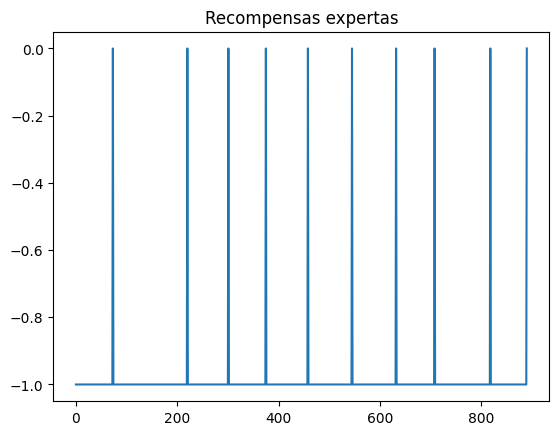

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Lee el archivo CSV
df = pd.read_csv('/home/usuario/Escritorio/Universidad/Master/IA4TES/Mayo/Acrobot/rewards_Acrobot__.csv')


print(df.shape[0])

plt.plot(df)
plt.title('Recompensas expertas')
plt.show()

In [19]:
expert_num_tray=np.genfromtxt('/home/usuario/Escritorio/Universidad/Master/IA4TES/Mayo/Acrobot/n_trayectoria_Acrobot__.csv', dtype=np.int32)

In [20]:
print(expert_num_tray)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 

In [21]:
import numpy as np

longitud_trayectoria_0 = np.count_nonzero(expert_num_tray == 0)
longitud_trayectoria_1 = np.count_nonzero(expert_num_tray == 1)
longitud_trayectoria_2 = np.count_nonzero(expert_num_tray == 2)
longitud_trayectoria_3 = np.count_nonzero(expert_num_tray == 3)
longitud_trayectoria_4 = np.count_nonzero(expert_num_tray == 4)
longitud_trayectoria_5 = np.count_nonzero(expert_num_tray == 5)
longitud_trayectoria_6 = np.count_nonzero(expert_num_tray== 6)
longitud_trayectoria_7 = np.count_nonzero(expert_num_tray == 7)
longitud_trayectoria_8 = np.count_nonzero(expert_num_tray== 8)
longitud_trayectoria_9 = np.count_nonzero(expert_num_tray== 9)


print(longitud_trayectoria_0 )
print(longitud_trayectoria_1 )
print(longitud_trayectoria_2 )
print(longitud_trayectoria_3 )
print(longitud_trayectoria_4 )
print(longitud_trayectoria_5 )
print(longitud_trayectoria_6 )
print(longitud_trayectoria_7 )
print(longitud_trayectoria_8 )
print(longitud_trayectoria_9 )


75
147
81
74
83
87
87
76
110
72


   -1.0
0  -1.0
1  -1.0
2  -1.0
3  -1.0
4  -1.0


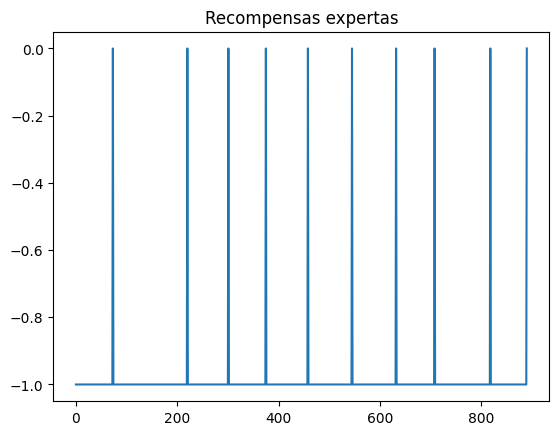

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Lee el archivo CSV
df = pd.read_csv('/home/usuario/Escritorio/Universidad/Master/IA4TES/Mayo/Acrobot/rewards_Acrobot__.csv')


print(df.head())

plt.plot(df)
plt.title('Recompensas expertas')
plt.show()

In [23]:
expert_rewards=np.genfromtxt('/home/usuario/Escritorio/Universidad/Master/IA4TES/Mayo/Acrobot/rewards_Acrobot__.csv', dtype=np.int32)
print(np.sum(expert_rewards[0:75]))
print(np.sum(expert_rewards[75:222]))
print(np.sum(expert_rewards[222:303]))
print(np.sum(expert_rewards[303:377]))
print(np.sum(expert_rewards[377:460]))
print(np.sum(expert_rewards[460:547]))
print(np.sum(expert_rewards[547:634 ]))
print(np.sum(expert_rewards[634:710 ]))
print(np.sum(expert_rewards[710: 820]))
print(np.sum(expert_rewards[820 : 892]))

-74
-146
-80
-73
-82
-86
-86
-75
-109
-71


# LUNAR LANDER

In [ ]:
!pip install swig

In [ ]:
!git clone https://github.com/pybox2d/pybox2d

fatal: destination path 'pybox2d' already exists and is not an empty directory.


In [ ]:
!cd pybox2d && python setup.py build && python setup.py install

Se han truncado las últimas 5000 líneas del flujo de salida.
Box2D/Box2D_wrap.cpp: In function ‘PyObject* _wrap_new_b2Mat33(PyObject*, PyObject*)’:
Box2D/Box2D_wrap.cpp:7349:3: warning: this ‘if’ clause does not guard... []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wmisleading-indentation-Wmisleading-indentation]8;;]
 7349 |   if (!(argc = SWIG_Python_UnpackTuple(args, "new_b2Mat33", 0, 3, argv))) SWIG_fail; --argc; if (argc == 0) {
      |   ^~
Box2D/Box2D_wrap.cpp:7349:86: note: ...this statement, but the latter is misleadingly indented as if it were guarded by the ‘if’
 7349 | (!(argc = SWIG_Python_UnpackTuple(args, "new_b2Mat33", 0, 3, argv))) SWIG_fail; --argc; if (argc == 0) {
      |                                                                                 ^~

Box2D/Box2D_wrap.cpp:7352:5: warning: this ‘if’ clause does not guard... []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wmisleading-indentation-Wmisleading-indentation

In [ ]:
pip install gymnasium[box2d]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp310-cp310-linux_x86_64.whl size=2373078 sha256=782ef71f0c924d0b564f33cc38f5f65b64f5e8343189e87b9c394f5156af22fd
  Stored in directory: /root/.cache/pip/wheels/db/8f/6a/eaaadf056fba10a98d986f6dce954e6201ba3126926fc5ad9e
Successfully built box2d-py


In [ ]:
expert_observations=[]
expert_actions=[]
expert_next_observations=[]
expert_rewards=[]
expert_n_trayectoria=[]


env = gym.make('LunarLander-v2')

# Definimos el modelo experto
ppo=PPO(policy="MlpPolicy", env=env, verbose=0)
ppo.learn(total_timesteps=TOTAL_TIMESTEP_lunarlander)

expert_observations = '/content/drive/MyDrive/Extended_GAIL/observations_LunarLander.csv'
expert_actions = '/content/drive/MyDrive/Extended_GAIL/actions_LunarLander.csv'
expert_next_observations='/content/drive/MyDrive/Extended_GAIL/next_observations_LunarLander.csv'
expert_rewards='/content/drive/MyDrive/Extended_GAIL/rewards_LunarLander.csv'
expert_n_trayectoria='/content/drive/MyDrive/Extended_GAIL/n_trayectoria_LunarLander.csv'

with open(expert_observations, 'w', newline='') as expert_observations_csv:
    # Crear el escritor CSV
    escritor_csv_obs=csv.writer(expert_observations_csv)
    with open(expert_actions, 'w', newline='') as expert_actions_csv:
        escritor_csv_act=csv.writer(expert_actions_csv)
        with open(expert_next_observations, 'w', newline='') as expert_next_observations_csv:
            escritor_csv_next_obs=csv.writer(expert_next_observations_csv)
            with open(expert_rewards, 'w', newline='') as expert_rewards_csv:
                escritor_csv_reward=csv.writer(expert_rewards_csv)
                with open(expert_n_trayectoria, 'w', newline='') as expert_n_trayectoria_csv:
                  escritor_csv_n_tray=csv.writer(expert_n_trayectoria_csv)
                  for i in range(EPISODES):
                      obs, info = env.reset()
                      terminated = False
                      truncated=False
                      while not terminated and not truncated:
                          a, _ = ppo.predict(obs)
                          obs2, reward, terminated, truncated, info = env.step(a)

                          escritor_csv_obs.writerow(obs)

                          escritor_csv_act.writerow([a])
                          escritor_csv_next_obs.writerow(obs2)
                          escritor_csv_reward.writerow([reward])
                          escritor_csv_n_tray.writerow([i])
                          obs=obs2

env.close()

6309


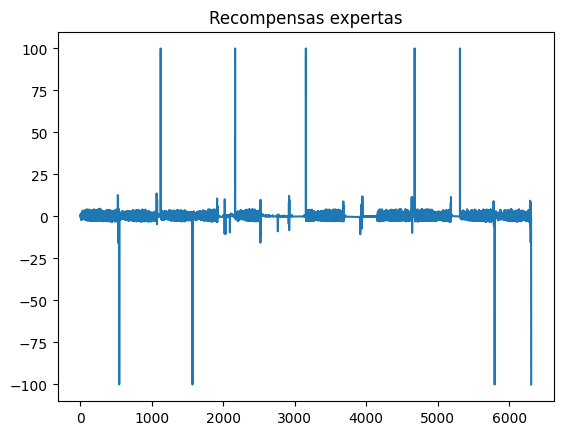

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Lee el archivo CSV
df = pd.read_csv('/content/drive/MyDrive/Extended_GAIL/rewards_LunarLander.csv')


print(df.shape[0])

plt.plot(df)
plt.title('Recompensas expertas')
plt.show()

In [ ]:
expert_num_tray=np.genfromtxt('/content/drive/MyDrive/Extended_GAIL/n_trayectoria_LunarLander.csv', dtype=np.int32)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import numpy as np

longitud_trayectoria_0 = np.count_nonzero(expert_num_tray == 0)
longitud_trayectoria_1 = np.count_nonzero(expert_num_tray == 1)
longitud_trayectoria_2 = np.count_nonzero(expert_num_tray == 2)
longitud_trayectoria_3 = np.count_nonzero(expert_num_tray == 3)
longitud_trayectoria_4 = np.count_nonzero(expert_num_tray == 4)
longitud_trayectoria_5 = np.count_nonzero(expert_num_tray == 5)
longitud_trayectoria_6 = np.count_nonzero(expert_num_tray== 6)
longitud_trayectoria_7 = np.count_nonzero(expert_num_tray == 7)
longitud_trayectoria_8 = np.count_nonzero(expert_num_tray== 8)
longitud_trayectoria_9 = np.count_nonzero(expert_num_tray== 9)


print(longitud_trayectoria_0 )
print(longitud_trayectoria_1 )
print(longitud_trayectoria_2 )
print(longitud_trayectoria_3 )
print(longitud_trayectoria_4 )
print(longitud_trayectoria_5 )
print(longitud_trayectoria_6 )
print(longitud_trayectoria_7 )
print(longitud_trayectoria_8 )
print(longitud_trayectoria_9 )


547
580
445
596
990
1000
522
634
485
511


In [ ]:
expert_rewards=np.genfromtxt('/content/drive/MyDrive/Extended_GAIL/rewards_LunarLander.csv', dtype=np.int32)
print(np.sum(expert_rewards[0:547]))
print(np.sum(expert_rewards[547:1127]))
print(np.sum(expert_rewards[1127:1572]))
print(np.sum(expert_rewards[1572:2168]))
print(np.sum(expert_rewards[2168:3158]))
print(np.sum(expert_rewards[3158:4158]))
print(np.sum(expert_rewards[4158: 4680]))
print(np.sum(expert_rewards[4680:5314]))
print(np.sum(expert_rewards[5314: 5799]))
print(np.sum(expert_rewards[5799 :  6310]))

-109
137
-37
154
154
27
167
149
-93
-80
